# Housing Price Estimator for Greater Seattle housing data set - Exploratory Data Analysis (EDA)

Data set
Data consists actual homes listing for 2 months till Mid-May 2021. It contains Active, Sold listings, Property details - Status(Active/Sold), ZipCode,City, City Code, State, Price, Days_on_market, Beds, Baths, Sqft, Date of listing,Acres and Lot_size. We then added Livibility Index(Liv_index from https://www.areavibes.com/) based on the city which ranges from 50-90.

Exploratory Data Analysis
<p> 1. Data was cleaned to remove nan and null values.

<p> 2. Dtypes of Columns were changed from object to str/int/float/date as required.

<p> 3. Price was cleaned to remove commas.

<p> 4. Some columns like State, City Code , MLS, ID, Address, Source , School District , Property Type were dropped as they do not add value to the model.

In [1]:
import pandas as pd #
from pathlib import Path
filepath=("../Data/housing_prices_pdf_final.csv")
data_df=pd.read_csv(filepath,infer_datetime_format=True, parse_dates=['Start Date'])

In [2]:
data_df.head()

,Id,MLS,Stat,Type,Address,ZipCode,City,City Code,State,List/Sell,...,Bds,Bths,SF,Start Date,Acres,Source,Lot Square Footage,Property Type,SchoolDistric,Liv2
0,1.0,1781634.0,A,RESI,28022 39th Ave S,98001,Auburn,100.0,WA,"725,000",...,3.0,0.00,3060,2021-05-26,0.227,king County,9894.0,Single Family,Federal Way,68.0
1,2.0,1780235.0,A,RESI,35832 Military Rd S,98001,Auburn,100.0,WA,"300,000",...,2.0,1.00,920,2021-05-26,0.164,Public Records,7150.0,Single Family,Federal Way,68.0
2,3.0,1753425.0,S,RESI,36655 45th Ave S,98001,Auburn,100.0,WA,"555,000",...,2.0,1.00,1196,2021-05-07,0.544,"Public Records, County",23689.0,Single Family,Federal Way,68.0
3,4.0,1680653.0,A,RESI,28110 48th Ave S,98001,Auburn,100.0,WA,"1,300,000",...,4.0,1.75,2850,2020-10-22,6.000,Realist,261360.0,Single Family,Auburn,68.0
4,5.0,1632834.0,S,RESI,37115 39th Ave S,98001,Auburn,100.0,WA,"250,000",...,2.0,1.50,1200,2021-05-20,0.220,County Record,9600.0,Single Family,Federal Way,68.0


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4190 entries, 0 to 4189
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  4188 non-null   float64       
 1   MLS                 4188 non-null   float64       
 2   Stat                4188 non-null   object        
 3   Type                4188 non-null   object        
 4   Address             4188 non-null   object        
 5   ZipCode             4188 non-null   object        
 6   City                4188 non-null   object        
 7   City Code           4188 non-null   float64       
 8   State               4188 non-null   object        
 9   List/Sell           4183 non-null   object        
 10  Days on Market      4188 non-null   float64       
 11  Bds                 4188 non-null   float64       
 12  Bths                4169 non-null   float64       
 13  SF                  4155 non-null   object      

In [4]:
data_df['City'].unique()


array(['Auburn', 'Federal Way', 'Algona', 'Kirkland', 'Redmond',
       'Maple Valley', 'Medina', 'Mercer Island', 'Kent', 'Covington',
       'Des Moines', 'Bellevue', 'North Bend', 'Yarrow Point', 'Pacific',
       'Clyde Hill', 'Preston', 'Issaquah', 'Ravensdale', 'Beaux Arts',
       'Renton', 'Newcastle', 'Snoqualmie', 'Vashon', 'Woodinville',
       'Sammamish', 'Seattle', 'Lake Forest Park', 'Black Diamond',
       'Shoreline', 'Bothell', 'Burien', 'Normandy Park', 'SeaTac',
       'Tukwila', 'Baring', 'Gold Bar', 'Skykomish', 'Milton',
       'Carnation', 'Duvall', 'Kenmore', 'Enumclaw', 'Fall City',
       'Hobart', nan], dtype=object)

In [5]:
data_df['State'].unique() # to check if there are other states


array(['WA', nan], dtype=object)

In [6]:
state=data_df.loc[data_df['State']!='WA']

In [7]:
state.head()

,Id,MLS,Stat,Type,Address,ZipCode,City,City Code,State,List/Sell,...,Bds,Bths,SF,Start Date,Acres,Source,Lot Square Footage,Property Type,SchoolDistric,Liv2
4188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"27,500,000",...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# there are 2 rows with nan values and these can be dropped

data_df.dropna(axis=0, inplace =True)

In [9]:
# state=data_df.loc[data_df['State']!='WA']
data_df.isnull().sum() # no nan values

Id                    0
MLS                   0
Stat                  0
Type                  0
Address               0
ZipCode               0
City                  0
City Code             0
State                 0
List/Sell             0
Days on Market        0
Bds                   0
Bths                  0
SF                    0
Start Date            0
Acres                 0
Source                0
Lot Square Footage    0
Property Type         0
SchoolDistric         0
Liv2                  0
dtype: int64

In [10]:
data=data_df.drop(columns=['MLS','Address','City Code','SchoolDistric','Source']) #dropped these columns as it doesnot impact the model 

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4187
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  4128 non-null   float64       
 1   Stat                4128 non-null   object        
 2   Type                4128 non-null   object        
 3   ZipCode             4128 non-null   object        
 4   City                4128 non-null   object        
 5   State               4128 non-null   object        
 6   List/Sell           4128 non-null   object        
 7   Days on Market      4128 non-null   float64       
 8   Bds                 4128 non-null   float64       
 9   Bths                4128 non-null   float64       
 10  SF                  4128 non-null   object        
 11  Start Date          4128 non-null   datetime64[ns]
 12  Acres               4128 non-null   float64       
 13  Lot Square Footage  4128 non-null   float64     

In [12]:
data.head()

,Id,Stat,Type,ZipCode,City,State,List/Sell,Days on Market,Bds,Bths,SF,Start Date,Acres,Lot Square Footage,Property Type,Liv2
0,1.0,A,RESI,98001,Auburn,WA,"725,000",4.0,3.0,0.00,3060,2021-05-26,0.227,9894.0,Single Family,68.0
1,2.0,A,RESI,98001,Auburn,WA,"300,000",4.0,2.0,1.00,920,2021-05-26,0.164,7150.0,Single Family,68.0
2,3.0,S,RESI,98001,Auburn,WA,"555,000",3.0,2.0,1.00,1196,2021-05-07,0.544,23689.0,Single Family,68.0
3,4.0,A,RESI,98001,Auburn,WA,"1,300,000",220.0,4.0,1.75,2850,2020-10-22,6.000,261360.0,Single Family,68.0
4,5.0,S,RESI,98001,Auburn,WA,"250,000",46.0,2.0,1.50,1200,2021-05-20,0.220,9600.0,Single Family,68.0


In [13]:
data['Type'].unique()

array(['RESI'], dtype=object)

In [14]:
data['Property Type'].unique()

array(['Single Family'], dtype=object)

In [15]:
# Since both Type and Property type have only value, we can drop these columns too!!
data=data.drop(columns=['Property Type','Type','State', 'Id'])

In [16]:
data.head()

,Stat,ZipCode,City,List/Sell,Days on Market,Bds,Bths,SF,Start Date,Acres,Lot Square Footage,Liv2
0,A,98001,Auburn,"725,000",4.0,3.0,0.00,3060,2021-05-26,0.227,9894.0,68.0
1,A,98001,Auburn,"300,000",4.0,2.0,1.00,920,2021-05-26,0.164,7150.0,68.0
2,S,98001,Auburn,"555,000",3.0,2.0,1.00,1196,2021-05-07,0.544,23689.0,68.0
3,A,98001,Auburn,"1,300,000",220.0,4.0,1.75,2850,2020-10-22,6.000,261360.0,68.0
4,S,98001,Auburn,"250,000",46.0,2.0,1.50,1200,2021-05-20,0.220,9600.0,68.0


In [17]:
# data['List/Sell'].astype(str).astype(int) # this doesnot work since we have , in the value. We need to remove , from the price

In [18]:
data['List/Sell']=data['List/Sell'].str.replace(",","") # after removing comma change to int type


In [19]:
data['List/Sell']=data['List/Sell'].astype('int')


In [20]:
data['SF']=data['SF'].str.replace(",","") # to remove comma from the values
data['SF']=data['SF'].astype('int') # to change the dtype to int

In [21]:
data['Stat']=data['Stat'].astype('str')
data['City']=data['City'].astype('str')


In [22]:
data.iloc[1197:1199,:] # to locate the error where ZipCode has N

,Stat,ZipCode,City,List/Sell,Days on Market,Bds,Bths,SF,Start Date,Acres,Lot Square Footage,Liv2
1203,A,98074,Sammamish,2299000,17.0,4.0,3.25,4440,2021-05-13,2.797,121844.0,86.0
1204,S,N 98074,Sammamish,1106632,3.0,4.0,3.25,2801,2021-05-12,0.117,5101.0,86.0


In [23]:
data['ZipCode']=data['ZipCode'].str.replace("N","")
data.iloc[1197:1199,:]


,Stat,ZipCode,City,List/Sell,Days on Market,Bds,Bths,SF,Start Date,Acres,Lot Square Footage,Liv2
1203,A,98074,Sammamish,2299000,17.0,4.0,3.25,4440,2021-05-13,2.797,121844.0,86.0
1204,S,98074,Sammamish,1106632,3.0,4.0,3.25,2801,2021-05-12,0.117,5101.0,86.0


In [24]:
data['ZipCode']=data['ZipCode'].astype('int')

In [25]:
data.head()

,Stat,ZipCode,City,List/Sell,Days on Market,Bds,Bths,SF,Start Date,Acres,Lot Square Footage,Liv2
0,A,98001,Auburn,725000,4.0,3.0,0.00,3060,2021-05-26,0.227,9894.0,68.0
1,A,98001,Auburn,300000,4.0,2.0,1.00,920,2021-05-26,0.164,7150.0,68.0
2,S,98001,Auburn,555000,3.0,2.0,1.00,1196,2021-05-07,0.544,23689.0,68.0
3,A,98001,Auburn,1300000,220.0,4.0,1.75,2850,2020-10-22,6.000,261360.0,68.0
4,S,98001,Auburn,250000,46.0,2.0,1.50,1200,2021-05-20,0.220,9600.0,68.0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4187
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Stat                4128 non-null   object        
 1   ZipCode             4128 non-null   int32         
 2   City                4128 non-null   object        
 3   List/Sell           4128 non-null   int32         
 4   Days on Market      4128 non-null   float64       
 5   Bds                 4128 non-null   float64       
 6   Bths                4128 non-null   float64       
 7   SF                  4128 non-null   int32         
 8   Start Date          4128 non-null   datetime64[ns]
 9   Acres               4128 non-null   float64       
 10  Lot Square Footage  4128 non-null   float64       
 11  Liv2                4128 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int32(3), object(2)
memory usage: 370.9+ KB


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np


Bad key "text.kerning_factor" on line 4 in
C:\Users\Joanne\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [28]:
columns=list(data.columns)
columns

['Stat',
 'ZipCode',
 'City',
 'List/Sell',
 'Days on Market',
 'Bds',
 'Bths',
 'SF',
 'Start Date',
 'Acres',
 'Lot Square Footage',
 'Liv2']

In [29]:
columns_new=['Status','ZipCode','City','Price','Days_on_market','Beds','Baths','Sqft','Date','Acres','Lot_sqft','Liv_index']
data.columns=columns_new

In [30]:
data.head()

,Status,ZipCode,City,Price,Days_on_market,Beds,Baths,Sqft,Date,Acres,Lot_sqft,Liv_index
0,A,98001,Auburn,725000,4.0,3.0,0.00,3060,2021-05-26,0.227,9894.0,68.0
1,A,98001,Auburn,300000,4.0,2.0,1.00,920,2021-05-26,0.164,7150.0,68.0
2,S,98001,Auburn,555000,3.0,2.0,1.00,1196,2021-05-07,0.544,23689.0,68.0
3,A,98001,Auburn,1300000,220.0,4.0,1.75,2850,2020-10-22,6.000,261360.0,68.0
4,S,98001,Auburn,250000,46.0,2.0,1.50,1200,2021-05-20,0.220,9600.0,68.0


### SNS Paired plot image saved

In [46]:
#sns.pairplot(data,corner=True,height=3)

In [47]:
data.describe()

,ZipCode,Price,Days_on_market,Beds,Baths,Sqft,Acres,Lot_sqft,Liv_index,Liv_group,Days_group
count,4128.000000,4.128000e+03,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4.128000e+03,4128.000000,4128.000000,4128.000000
mean,98081.169331,1.171752e+06,21.060320,3.496366,2.392066,2354.452277,0.559676,2.437936e+04,71.022045,66.424419,19.246609
std,51.551933,1.229190e+06,58.484313,1.043278,0.933890,1270.201494,2.762843,1.203497e+05,8.386256,8.728526,58.455729
min,98001.000000,1.390000e+05,0.000000,0.000000,0.000000,162.000000,0.000000,1.000000e+00,59.000000,50.000000,0.000000
25%,98034.000000,6.599900e+05,4.000000,3.000000,1.750000,1500.000000,0.098000,4.258750e+03,64.000000,60.000000,0.000000
50%,98077.000000,8.682225e+05,6.000000,3.000000,2.500000,2114.500000,0.165000,7.200000e+03,67.000000,60.000000,5.000000
75%,98118.000000,1.299238e+06,12.000000,4.000000,2.750000,2871.750000,0.251000,1.095050e+04,80.000000,80.000000,10.000000
max,98199.000000,2.750000e+07,966.000000,13.000000,11.700000,15360.000000,109.700000,4.778532e+06,86.000000,80.000000,965.000000


In [48]:
data['Status']=data['Status'].astype('str')
data['City']=data['City'].astype('str')

In [49]:
data.to_csv('cleaned_data.csv')

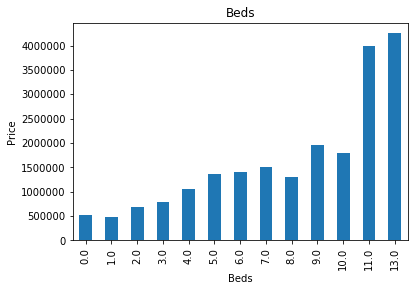

In [50]:
data.groupby('Beds')['Price'].median().plot.bar()
plt.xlabel('Beds')
plt.ylabel('Price')
plt.title('Beds')
plt.show()

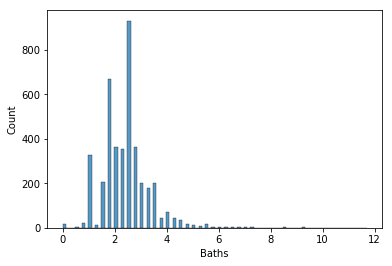

In [51]:
sns.histplot(data.Baths)

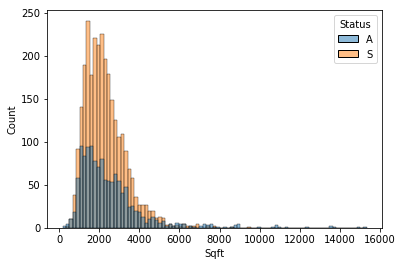

In [52]:
sns.histplot(data=data, x= 'Sqft', hue='Status')

In [53]:

data['Liv_group']=[Liv_index//10*10 for Liv_index in data.Liv_index] # creating buckets for the liv_index
data['Days_group']=[Days_on_market//5*5 for Days_on_market in data.Days_on_market]
data.head()

,Status,ZipCode,City,Price,Days_on_market,Beds,Baths,Sqft,Date,Acres,Lot_sqft,Liv_index,Liv_group,Days_group
0,A,98001,Auburn,725000,4.0,3.0,0.00,3060,2021-05-26,0.227,9894.0,68.0,60.0,0.0
1,A,98001,Auburn,300000,4.0,2.0,1.00,920,2021-05-26,0.164,7150.0,68.0,60.0,0.0
2,S,98001,Auburn,555000,3.0,2.0,1.00,1196,2021-05-07,0.544,23689.0,68.0,60.0,0.0
3,A,98001,Auburn,1300000,220.0,4.0,1.75,2850,2020-10-22,6.000,261360.0,68.0,60.0,220.0
4,S,98001,Auburn,250000,46.0,2.0,1.50,1200,2021-05-20,0.220,9600.0,68.0,60.0,45.0


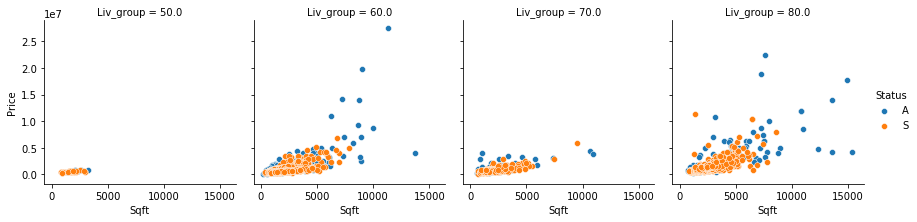

In [54]:
g = sns.FacetGrid(data, col='Liv_group',hue='Status')
g.map_dataframe(sns.scatterplot,y='Price',x='Sqft')
g.set_axis_labels( 'Sqft','Price')
g.add_legend()

In [55]:
# from the plot we can see that the home listed are mainly in the 60 and 80 liviability index group. And as the livability index increases the pprice and sqft also increase.

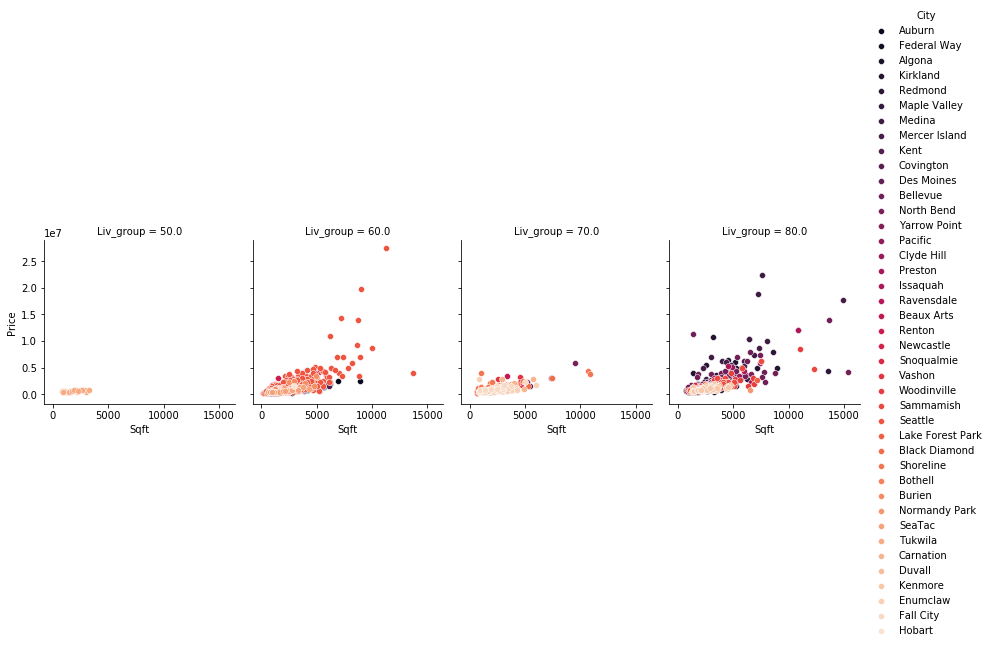

In [56]:
g = sns.FacetGrid(data, col='Liv_group',hue='City',palette='rocket')
g.map_dataframe(sns.scatterplot,y='Price',x='Sqft')
g.set_axis_labels( 'Sqft','Price')
g.add_legend()

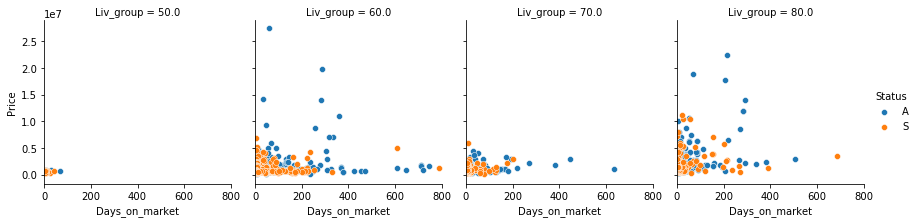

In [57]:
g = sns.FacetGrid(data, col='Liv_group',hue='Status',xlim=(0,800))
g.map_dataframe(sns.scatterplot,y='Price',x='Days_on_market')
g.set_axis_labels('Days_on_market','Price')
g.add_legend()

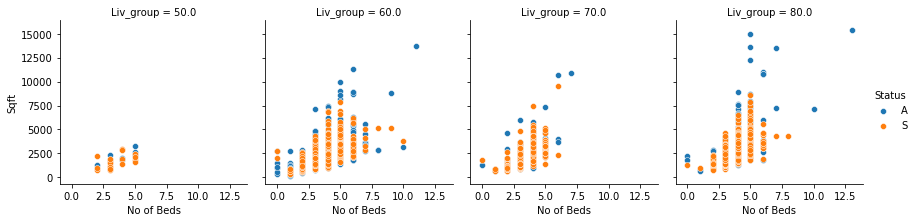

In [58]:
g = sns.FacetGrid(data, col='Liv_group',hue='Status')
g.map_dataframe(sns.scatterplot,x='Beds',y='Sqft')
g.set_axis_labels('No of Beds', 'Sqft')
g.add_legend()

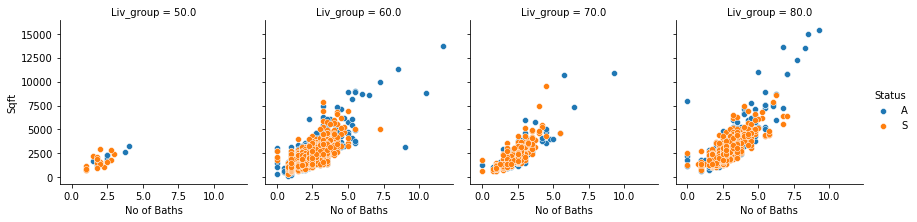

In [59]:
g = sns.FacetGrid(data, col='Liv_group',hue='Status')
g.map_dataframe(sns.scatterplot,x='Baths',y='Sqft')
g.set_axis_labels('No of Baths', 'Sqft')
g.add_legend()

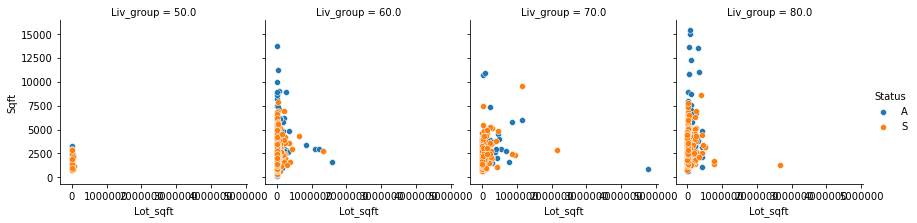

In [60]:
g = sns.FacetGrid(data, col='Liv_group',hue='Status')
g.map_dataframe(sns.scatterplot,x='Lot_sqft',y='Sqft')
g.set_axis_labels('Lot_sqft', 'Sqft')
g.add_legend()